# Data Science and Business Analytics Internship

GRIP @ The Sparks Foundation

BY: Kanwati Megnath

TASK 2 - Prediction Using UnSupervised Machine Learning.

# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")

# Reading the data from source

In [2]:
df = pd.read_csv("iris.csv")

Data Exploration 

In [19]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Plotting the Data

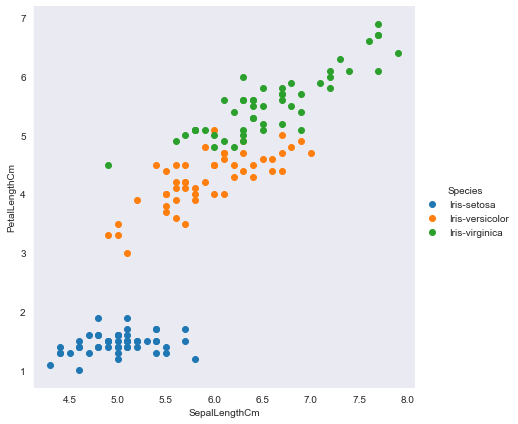

In [9]:
#scatter plot
sns.FacetGrid(df, hue ="Species",  
              height = 6).map(plt.scatter,  
                              'SepalLengthCm',  
                              'PetalLengthCm').add_legend()

# KMeans Clustering

Calculate the squared of distances of data points to centriods

In [23]:
x = df.iloc[:, [0, 1, 2, 3]].values

i = range(1,10)
for i in range(1,10):
  km = KMeans(n_clusters = i)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)

Now the Elbow Graph will be plotted 

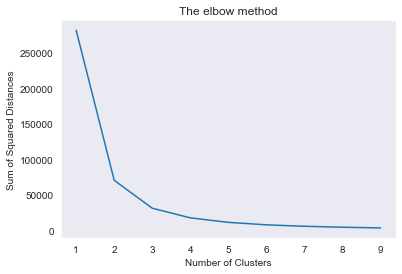

In [16]:
plt.plot(range(1,10), sum_of_squared_distance)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')
plt.show()

Applying kmeans to the dataset/creating the kmeans classifier

In [17]:
kms = KMeans(n_clusters = 3)
y_kms = kms.fit_predict(x)
kms.cluster_centers_

array([[ 75.5  ,   5.936,   2.77 ,   4.26 ],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552]])

# Visualising the clusters and plotting the centroids

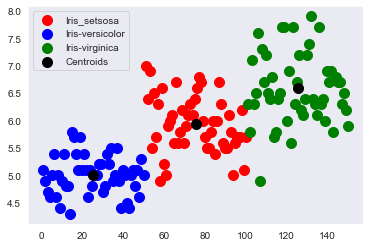

In [18]:
plt.scatter(x[y_kms == 0,0], x[y_kms == 0,1],
           s = 100, c = 'red', label = 'Iris_setsosa')
plt.scatter(x[y_kms == 1,0], x[y_kms == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kms == 2,0], x[y_kms == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_[:,1],
           s = 100, c = 'black', label = 'Centroids' )
plt.legend()

In [ ]:
# Conclusion: 

The Iris dataset is divided into 3 clusters using KMeans Clustering 